## Final Project Submission

Please fill out:
* Student name: Mohammed Siddiqui
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_fin = pd.read_csv("tn.movie_budgets.csv")
df_title =pd.read_csv('title.basics.csv')
df_ratings =pd.read_csv('title.ratings.csv')
df_CPI =pd.read_csv('CPIAUCNS.csv')

In [3]:
df_CPI['DATE'] = pd.to_datetime(df_CPI['DATE'])
df_CPI['Multiplier'] = df_CPI['CPIAUCNS'].iloc[-1] / df_CPI['CPIAUCNS']
df_CPI['DATE'] = df_CPI['DATE'].apply(lambda x: x.strftime('%Y-%m'))

In [4]:
df_CPI.head()

,DATE,CPIAUCNS,Multiplier
0,1990-01,127.4,2.044537
1,1990-02,128.0,2.034953
2,1990-03,128.7,2.023885
3,1990-04,128.9,2.020745
4,1990-05,129.2,2.016053


In [5]:
def dollar_to_int(column):
    df_fin[column] = df_fin[column].str.replace(',', '')
    df_fin[column] = df_fin[column].str.replace('$', '')
    df_fin[column] = df_fin[column].astype(np.int64)
    return df_fin

In [6]:
dollar_to_int('domestic_gross')
dollar_to_int('production_budget')
dollar_to_int('worldwide_gross')
df_fin['formatted_date'] = pd.to_datetime(df_fin['release_date'], format='%b %d, %Y')
df_fin['formatted_date'] = df_fin['formatted_date'].apply(lambda x: x.strftime('%Y-%m'))
df_fin['movie'] = df_fin['movie'].astype(str)

In [7]:
df_fin.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,formatted_date
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009-12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011-05
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019-06
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015-05
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017-12


In [8]:
df_fin = pd.merge(df_fin, df_CPI,left_on='formatted_date', right_on='DATE', how='left')

In [9]:
df_fin['budget_adj'] = df_fin['production_budget'] * df_fin['Multiplier']
df_fin['domestic_adj'] =df_fin['domestic_gross'] * df_fin['Multiplier']
df_fin['worldwide_adj'] =df_fin['worldwide_gross'] * df_fin['Multiplier']
df_fin['foreign_adj'] = df_fin['worldwide_adj'] - df_fin['domestic_adj']

In [10]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   formatted_date     5782 non-null   object 
 7   DATE               5210 non-null   object 
 8   CPIAUCNS           5210 non-null   float64
 9   Multiplier         5210 non-null   float64
 10  budget_adj         5210 non-null   float64
 11  domestic_adj       5210 non-null   float64
 12  worldwide_adj      5210 non-null   float64
 13  foreign_adj        5210 non-null   float64
dtypes: float64(6), int64(4), object(4)
memory usage: 677.6+ KB


In [11]:
df_title.set_index("tconst", inplace=True)
df_ratings.set_index("tconst", inplace=True)

In [12]:
df_imdb = pd.merge(df_title, df_ratings,left_index=True, right_index=True, how='inner')
df_imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [13]:
df_imdb.drop(['original_title'], axis=1, inplace= True)


In [14]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt0063540 to tt9916160
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   start_year       73856 non-null  int64  
 2   runtime_minutes  66236 non-null  float64
 3   genres           73052 non-null  object 
 4   averagerating    73856 non-null  float64
 5   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.9+ MB


What are the smart people doing?,What are the dumb people doing?

In [15]:
df_fin =df_fin.drop(['id', 'release_date', 'DATE'], axis=1)

In [16]:
df_fin.describe()

,production_budget,domestic_gross,worldwide_gross,CPIAUCNS,Multiplier,budget_adj,domestic_adj,worldwide_adj,foreign_adj
count,5.782000e+03,5.782000e+03,5.782000e+03,5210.000000,5210.000000,5.210000e+03,5.210000e+03,5.210000e+03,5.210000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07,205.674621,1.297372,4.339715e+07,5.497544e+07,1.216141e+08,6.663868e+07
std,4.181208e+07,6.824060e+07,1.747200e+08,30.432954,0.211823,5.284135e+07,8.852260e+07,2.238253e+08,1.435573e+08
min,1.100000e+03,0.000000e+00,0.000000e+00,127.400000,1.000000,1.458867e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06,180.700000,1.117583,7.332928e+06,1.304452e+06,4.496452e+06,2.155211e+04
50%,1.700000e+07,1.722594e+07,2.798445e+07,211.943000,1.228983,2.406857e+07,2.228574e+07,3.914835e+07,1.073757e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07,233.069000,1.441472,5.884849e+07,6.940433e+07,1.318066e+08,6.364170e+07
max,4.250000e+08,9.366622e+08,2.776345e+09,260.474000,2.044537,5.126278e+08,1.064769e+09,3.565907e+09,2.501139e+09


In [17]:
df_fin= df_fin[df_fin['domestic_gross'] != 0]
df_fin= df_fin[df_fin['worldwide_gross'] != 0]
df_fin= df_fin[df_fin['production_budget'] >= 70000000]

In [18]:
df_imdb =df_imdb[df_imdb['numvotes'] > 1000]

In [19]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9611 entries, tt0069049 to tt9815714
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    9611 non-null   object 
 1   start_year       9611 non-null   int64  
 2   runtime_minutes  9603 non-null   float64
 3   genres           9609 non-null   object 
 4   averagerating    9611 non-null   float64
 5   numvotes         9611 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 525.6+ KB


In [20]:
df_all = pd.merge(df_imdb, df_fin,left_on='primary_title', right_on='movie', how='inner')

In [21]:
df_all

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie,production_budget,domestic_gross,worldwide_gross,formatted_date,CPIAUCNS,Multiplier,budget_adj,domestic_adj,worldwide_adj,foreign_adj
0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013-12,233.049,1.117679,1.017088e+08,6.509010e+07,2.099685e+08,1.448784e+08
1,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,215000000,652270625,1648854864,2015-06,238.638,1.091503,2.346731e+08,7.119551e+08,1.799729e+09,1.087774e+09
2,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,Tangled,260000000,200821936,586477240,2010-11,218.803,1.190450,3.095170e+08,2.390684e+08,6.981717e+08,4.591033e+08
3,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,John Carter,275000000,73058679,282778100,2012-03,229.392,1.135497,3.122618e+08,8.295793e+07,3.210938e+08,2.381358e+08
4,The A-Team,2010,117.0,"Action,Adventure,Thriller",6.8,235256,The A-Team,110000000,77222099,177241171,2010-06,217.965,1.195027,1.314529e+08,9.228247e+07,2.118079e+08,1.195255e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,Aladdin,2019,128.0,"Adventure,Comedy,Family",7.4,57549,Aladdin,182000000,246734314,619234314,2019-05,256.092,1.017111,1.851142e+08,2.509562e+08,6.298301e+08,3.788739e+08
325,Smallfoot,2018,96.0,"Adventure,Animation,Comedy",6.7,23295,Smallfoot,80000000,83240103,213691277,2018-09,252.439,1.031829,8.254636e+07,8.588959e+07,2.204930e+08,1.346034e+08
326,Wonder Park,2019,85.0,"Adventure,Animation,Comedy",5.7,3091,Wonder Park,100000000,45216793,115149422,2019-03,254.202,1.024673,1.024673e+08,4.633244e+07,1.179905e+08,7.165810e+07
327,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451,Dark Phoenix,350000000,42762350,149762350,2019-06,256.143,1.016909,3.559180e+08,4.348540e+07,1.522946e+08,1.088092e+08


<AxesSubplot:xlabel='budget_adj', ylabel='Count'>

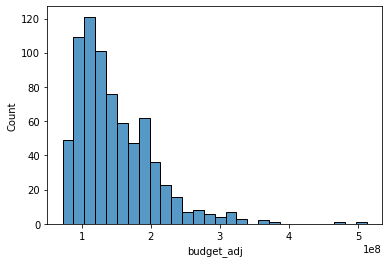

In [22]:
sns.histplot(df_fin['budget_adj'])

In [37]:
df_fin['ratio'] =(df_fin['domestic_adj']*0.5 +df_fin['foreign_adj']*0.25)/df_fin['budget_adj']

In [24]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 748
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              741 non-null    object 
 1   production_budget  741 non-null    int64  
 2   domestic_gross     741 non-null    int64  
 3   worldwide_gross    741 non-null    int64  
 4   formatted_date     741 non-null    object 
 5   CPIAUCNS           739 non-null    float64
 6   Multiplier         739 non-null    float64
 7   budget_adj         739 non-null    float64
 8   domestic_adj       739 non-null    float64
 9   worldwide_adj      739 non-null    float64
 10  foreign_adj        739 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 69.5+ KB


In [25]:
df_all['ratio'].describe()

count    329.000000
mean       1.088901
std        0.734026
min        0.052155
25%        0.598046
50%        0.939508
75%        1.393253
max        5.055344
Name: ratio, dtype: float64

In [26]:
df_success = df_all[df_all['ratio'] >1]

In [28]:
df_success

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie,production_budget,domestic_gross,worldwide_gross,formatted_date,CPIAUCNS,Multiplier,budget_adj,domestic_adj,worldwide_adj,foreign_adj,ratio
1,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,215000000,652270625,1648854864,2015-06,238.638,1.091503,2.346731e+08,7.119551e+08,1.799729e+09,1.087774e+09,2.675727
6,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,Toy Story 3,200000000,415004880,1068879522,2010-06,217.965,1.195027,2.390053e+08,4.959419e+08,1.277340e+09,7.813977e+08,1.854856
8,Shazam!,2019,132.0,"Action,Adventure,Comedy",7.4,109051,Shazam!,85000000,139606856,362899733,2019-04,255.548,1.019276,8.663848e+07,1.422979e+08,3.698951e+08,2.275971e+08,1.477961
9,Puss in Boots,2011,90.0,"Action,Adventure,Animation",6.6,133355,Puss in Boots,130000000,149260504,554987477,2011-10,226.421,1.150397,1.495516e+08,1.717088e+08,6.384558e+08,4.667470e+08,1.354323
10,Wonder Woman,2017,141.0,"Action,Adventure,Fantasy",7.5,487527,Wonder Woman,150000000,412563408,821133378,2017-06,244.955,1.063354,1.595032e+08,4.387012e+08,8.731559e+08,4.344547e+08,2.056161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",6.2,219125,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,2018-06,251.989,1.033672,1.757243e+08,4.317853e+08,1.349741e+09,9.179557e+08,2.534548
317,Dunkirk,2017,106.0,"Action,Drama,History",7.9,466580,Dunkirk,150000000,190068280,499837368,2017-07,244.786,1.064089,1.596133e+08,2.022495e+08,5.318713e+08,3.296218e+08,1.149843
319,Ant-Man and the Wasp,2018,118.0,"Action,Adventure,Comedy",7.1,244024,Ant-Man and the Wasp,130000000,216648740,623144660,2018-07,252.006,1.033602,1.343683e+08,2.239287e+08,6.440838e+08,4.201551e+08,1.614987
321,Deadpool 2,2018,119.0,"Action,Adventure,Comedy",7.8,391735,Deadpool 2,110000000,324591735,786680557,2018-05,251.588,1.035320,1.138852e+08,3.360562e+08,8.144658e+08,4.784096e+08,2.525619


<AxesSubplot:xlabel='formatted_date', ylabel='worldwide_adj'>

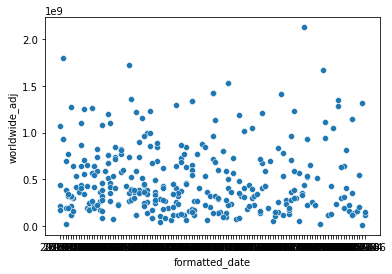

In [36]:
sns.scatterplot(data=df_fin, x='formatted_date', y='worldwide_adj')